In [1]:
import pandas as pd
from pandas import DataFrame
from urllib.parse import urljoin
import re
from matplotlib import pyplot as plt
import nltk
from pymystem3 import Mystem
import numpy as np 

from paths import DATA_PATH

In [2]:
posts_csv_path = DATA_PATH / 'posts.csv'
url = 'https://www.finam.ru'

In [246]:
field_names = ['date','href','author_name','title','text']

df = pd.read_csv(posts_csv_path, names=field_names)
df

,date,href,author_name,title,text
0,06.05.23,/publications/item/investory-vse-silnee-veryat...,\n\t\t\t\t\t\tМитрофанов Никита\t\t\t\t\t,Инвесторы все сильнее верят в дефолт США через...,Джо Байден не хочет повышать потолок госдолга
1,06.05.23,/publications/item/vstrecha-po-zernovoy-sdelke...,\n\t\t\t\t\t\tFinam.ru\t\t\t\t\t,Встреча по зерновой сделке на уровне заместите...,"Встреча пройдет с участием России, Украины, Ту..."
2,06.05.23,/publications/item/zakrytie-dividendnogo-reest...,"\n\t\t\t\t\t\tКожухова Елена, ИК ""Велес Капита...","Закрытие дивидендного реестра по ""Сбербанку"" с...",Последний день с рекордными дивидендами акции ...
3,06.05.23,/publications/item/banki-ssha-depozity-sokrash...,\n\t\t\t\t\t\tСусин Егор\t\t\t\t\t,"Банки США - депозиты сокращаются, кредиты растут",Ребалансировка балансов банков продолжается
4,06.05.23,/publications/item/rezultaty-ford-po-itogam-pr...,"\n\t\t\t\t\t\tПоздняков Дмитрий, Freedom Finan...",Результаты Ford по итогам прошедшего года можн...,Компания явно демонстрирует постепенное урегул...
...,...,...,...,...,...
30609,08.05.22,/publications/item/realnye-doxody-rossiyan-v-2...,"\n\t\t\t\t\t\tСуворов Евгений, банк ""ЦентроКре...",Реальные доходы россиян в 2022 году могут упас...,По отношению к пиковому 2013 году реальные рас...
30610,08.05.22,/publications/item/postpredy-es-v-voskresene-n...,\n\t\t\t\t\t\tРИА Новости\t\t\t\t\t,Постпреды ЕС в воскресенье не достигли соглаше...,Венгрия продолжает блокировать предложение Евр...
30611,08.05.22,/publications/item/sberbank-uvelichil-summu-kr...,\n\t\t\t\t\t\tFinam.ru\t\t\t\t\t,"""Сбербанк"" увеличил сумму кредита по ипотеке с...",Сумма кредита по ипотеке с господдержкой увели...
30612,08.05.22,/publications/item/yuan-xoroshiiy-instrument-d...,"\n\t\t\t\t\t\tЖильников Егор, ""Промсвязьбанк""\...",Юань - хороший инструмент для хеджирования рис...,Ввиду сильной экономики Китая юань менее подве...


In [247]:
finam_csv_date_fmt = '%d.%m.%y'

df['date'] = pd.to_datetime(df['date'], format=finam_csv_date_fmt)

In [232]:
df

,date,href,author_name,title,text
0,2023-05-06,/publications/item/investory-vse-silnee-veryat...,\n\t\t\t\t\t\tМитрофанов Никита\t\t\t\t\t,Инвесторы все сильнее верят в дефолт США через...,Джо Байден не хочет повышать потолок госдолга
1,2023-05-06,/publications/item/vstrecha-po-zernovoy-sdelke...,\n\t\t\t\t\t\tFinam.ru\t\t\t\t\t,Встреча по зерновой сделке на уровне заместите...,"Встреча пройдет с участием России, Украины, Ту..."
2,2023-05-06,/publications/item/zakrytie-dividendnogo-reest...,"\n\t\t\t\t\t\tКожухова Елена, ИК ""Велес Капита...","Закрытие дивидендного реестра по ""Сбербанку"" с...",Последний день с рекордными дивидендами акции ...
3,2023-05-06,/publications/item/banki-ssha-depozity-sokrash...,\n\t\t\t\t\t\tСусин Егор\t\t\t\t\t,"Банки США - депозиты сокращаются, кредиты растут",Ребалансировка балансов банков продолжается
4,2023-05-06,/publications/item/rezultaty-ford-po-itogam-pr...,"\n\t\t\t\t\t\tПоздняков Дмитрий, Freedom Finan...",Результаты Ford по итогам прошедшего года можн...,Компания явно демонстрирует постепенное урегул...
...,...,...,...,...,...
30609,2022-05-08,/publications/item/realnye-doxody-rossiyan-v-2...,"\n\t\t\t\t\t\tСуворов Евгений, банк ""ЦентроКре...",Реальные доходы россиян в 2022 году могут упас...,По отношению к пиковому 2013 году реальные рас...
30610,2022-05-08,/publications/item/postpredy-es-v-voskresene-n...,\n\t\t\t\t\t\tРИА Новости\t\t\t\t\t,Постпреды ЕС в воскресенье не достигли соглаше...,Венгрия продолжает блокировать предложение Евр...
30611,2022-05-08,/publications/item/sberbank-uvelichil-summu-kr...,\n\t\t\t\t\t\tFinam.ru\t\t\t\t\t,"""Сбербанк"" увеличил сумму кредита по ипотеке с...",Сумма кредита по ипотеке с господдержкой увели...
30612,2022-05-08,/publications/item/yuan-xoroshiiy-instrument-d...,"\n\t\t\t\t\t\tЖильников Егор, ""Промсвязьбанк""\...",Юань - хороший инструмент для хеджирования рис...,Ввиду сильной экономики Китая юань менее подве...


In [233]:
df['link'] = df['href'].apply(lambda href: urljoin(url, href))


In [234]:
df.drop(columns=['href'], inplace=True)

In [235]:
df['author'] = df['author_name'].str.extract(r'\n(?:\t){6}(.*?)(?:\t)+')

In [236]:
df.drop(columns=['author_name'], inplace=True)

In [237]:
df

,date,title,text,link,author
0,2023-05-06,Инвесторы все сильнее верят в дефолт США через...,Джо Байден не хочет повышать потолок госдолга,https://www.finam.ru/publications/item/investo...,Митрофанов Никита
1,2023-05-06,Встреча по зерновой сделке на уровне заместите...,"Встреча пройдет с участием России, Украины, Ту...",https://www.finam.ru/publications/item/vstrech...,Finam.ru
2,2023-05-06,"Закрытие дивидендного реестра по ""Сбербанку"" с...",Последний день с рекордными дивидендами акции ...,https://www.finam.ru/publications/item/zakryti...,"Кожухова Елена, ИК ""Велес Капитал"""
3,2023-05-06,"Банки США - депозиты сокращаются, кредиты растут",Ребалансировка балансов банков продолжается,https://www.finam.ru/publications/item/banki-s...,Сусин Егор
4,2023-05-06,Результаты Ford по итогам прошедшего года можн...,Компания явно демонстрирует постепенное урегул...,https://www.finam.ru/publications/item/rezulta...,"Поздняков Дмитрий, Freedom Finance Global"
...,...,...,...,...,...
30609,2022-05-08,Реальные доходы россиян в 2022 году могут упас...,По отношению к пиковому 2013 году реальные рас...,https://www.finam.ru/publications/item/realnye...,"Суворов Евгений, банк ""ЦентроКредит"""
30610,2022-05-08,Постпреды ЕС в воскресенье не достигли соглаше...,Венгрия продолжает блокировать предложение Евр...,https://www.finam.ru/publications/item/postpre...,РИА Новости
30611,2022-05-08,"""Сбербанк"" увеличил сумму кредита по ипотеке с...",Сумма кредита по ипотеке с господдержкой увели...,https://www.finam.ru/publications/item/sberban...,Finam.ru
30612,2022-05-08,Юань - хороший инструмент для хеджирования рис...,Ввиду сильной экономики Китая юань менее подве...,https://www.finam.ru/publications/item/yuan-xo...,"Жильников Егор, ""Промсвязьбанк"""


In [238]:
df['author'].value_counts()

author
Finam.ru                                 8959
РИА Новости                              5972
Кожухова Елена, ИК "Велес Капитал"        652
Коган Евгений                             637
Шульгин Михаил, "Открытие Инвестиции"     417
                                         ... 
Либин Сергей, "Газпромбанк"                 1
Фалкова Александра, УК "Первая"             1
Хачатрян Феликс, "Неотех"                   1
Малышев Роман, Asgard                       1
Ляшок Виктор, ИНСАП РАНХиГС                 1
Name: count, Length: 334, dtype: int64

In [239]:
news_df_csv_path = DATA_PATH / 'news_dataframe.csv'
df.to_csv(news_df_csv_path, index=False)

# Некоторые статистики датасета

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords

In [219]:
def plot_common_words(column='title'):
    lower_titles = df[column].str.lower()
    mystem = Mystem()
    lower_titles.dropna(inplace=True)
    title_words = lower_titles.apply(lambda line: ' '.join(filter(lambda x: x not in russian_stopwords, mystem.lemmatize(line))))

    title_counts = title_words.str.extractall(r'(\w+)').reset_index()[0].value_counts()
    print(title_counts)
    title_counts.plot(loglog=True, title='Zipf plot', xlabel='rank', ylabel='frequency')
    return title_counts

0
рынок             4156
год               3298
рубль             2791
российский        2718
мочь              2381
                  ... 
арго                 1
любимый              1
замгендиректор       1
эрдоганономика       1
бухгалтерский        1
Name: count, Length: 12017, dtype: int64


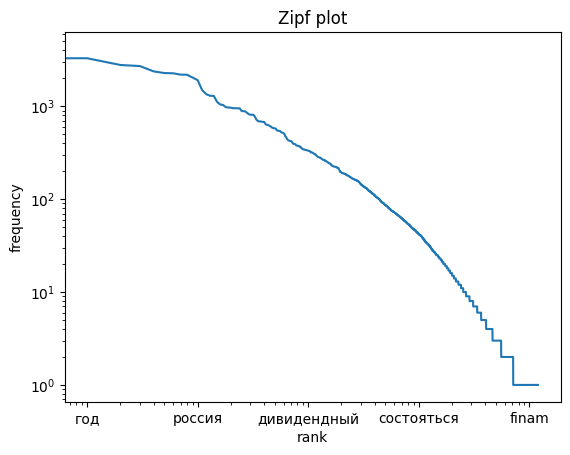

In [220]:
title_counts = plot_common_words('title')

0
год                  4613
рынок                3647
компания             3297
рубль                3153
мочь                 2836
                     ... 
подрывной               1
структурироваться       1
4435                    1
538                     1
соизмеримый             1
Name: count, Length: 15500, dtype: int64


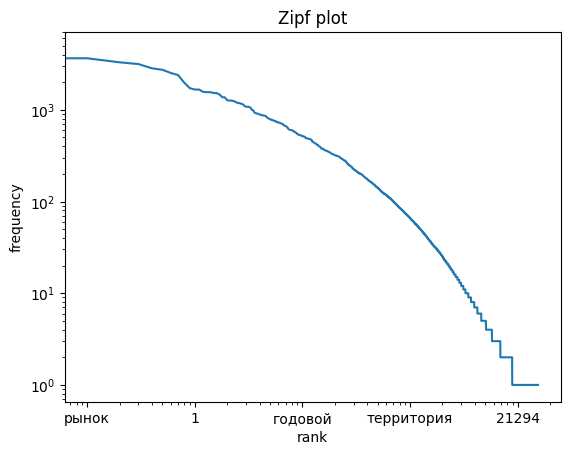

In [221]:
text_counts = plot_common_words('text')

In [ ]:
text_counts.keys().tolist()

In [251]:
df = pd.read_csv(news_df_csv_path, parse_dates= ['date'])

In [745]:
df.loc[209]

date                                                                                             2023-05-04 00:00:00
title                                                                         Qualcomm ухудшила прогноз на 2023 год 
text                                                Аналитики "Финама" подтверждают рейтинг "держать" акции компании
link                   https://www.finam.ru/publications/item/qualcomm-ukhudshila-prognoz-na-2023-god-20230504-1148/
author                                                                                 Ковалев Александр, ФГ "Финам"
title_text    Qualcomm ухудшила прогноз на 2023 год Аналитики "Финама" подтверждают рейтинг "держать" акции компании
label_0                                                                                                          1.0
label_1                                                                                                          NaN
Name: 209, dtype: object

In [286]:
df['title_text'] = df['title'] + df['text']

In [255]:
def get_filtered_words(df, column='text'):
    lower_titles = df[column].str.lower()
    mystem = Mystem()
    lower_titles.dropna(inplace=True)
    title_words = lower_titles.apply(lambda line: ' '.join(filter(lambda x: x not in russian_stopwords, mystem.lemmatize(line))))

    return title_words

In [270]:
pd.set_option('display.max_colwidth', None)

In [277]:
def filter_in(column, words):
    return column[column.apply(lambda line: all((word in line) for word in words))]

In [287]:
filtered_title_column = get_filtered_words(df, column='title_text')

In [288]:
filtered_title_column

0                                                                                                                                                                                                                                      инвестор     сильно   верить     дефолт   сша     3 - 5   неделя   джо   байден     хотеть   повышать   потолок   госдолг \n
1                                                                                                                                                                                      встреча     зерновой   сделка     уровень   заместитель   министр   состояться     близкий   будущее   встреча   пройти     участие   россия ,  украина ,  турция     оон \n
2                                                                   закрытие   дивидендный   реестр    " сбербанк "  становиться   значимый   фактор     индекс   мосбиржа   последний   день     рекордный   дивиденд   акция   банк     торговаться   8   май ,  торги   10   май   открыватьс

In [341]:
filter_in(filtered_title_column, ['хороший'])

9                                                                                                                                                                                                                                              таргет     акция   positive   technologies   составлять   2400   рубль   акция ,  вероятно ,      хороший   рынок \n
198                                                                                                                x5   group  -  хороший   защитный   история   аналитик  « финам »  отмечать ,    целевой   цена   акция   x5   group     12   мес .   составлять   1770   руб . ,      19 %  выше   текущий   цена     соответствовать   рейтинг  « покупать »\n
283                                                                                                                                                                                                                       акция   uber   иметь   потенциал     рост     44   доллар   бизнес   к

In [713]:
def get_markup_indexes(column, classes):
    indexes = {}
    for i, class_ in enumerate(classes):
        for samlpe in class_:
            if isinstance(samlpe, str):
                samlpe=[samlpe]
            markup = filter_in(column, samlpe)
            class_indexes = indexes.get(i, [])
            class_indexes.extend(markup.index)
            indexes[i] = class_indexes
            
    return indexes


def analyse_markup_indexes(column, markup_indexes):
    column_indexes = column.index
    column_indexes = set(column_indexes)
    markup_indexes_sets = {}
    
    print('target total', len(column_indexes))
    for label, indexes in markup_indexes.items():
        set_indexes = set(indexes)
        markup_indexes_sets[label] = set_indexes
        intersected = set_indexes.intersection(column_indexes)
        intersected_count = len(intersected)
        
        print(label, 'intersected with target', intersected_count)
    
    
    markups_intersected_set = markup_indexes_sets[0]
    for set_ in markup_indexes_sets.values():
        markups_intersected_set = markups_intersected_set.intersection(set_)
    
    markups_intersected_set_len = len(markups_intersected_set)
    markup_union_set = markup_indexes_sets[0]
    for set_ in markup_indexes_sets.values():
        markup_union_set = markup_union_set.union(set_)
    markups_len = len(markup_union_set)

    
    print('balance')
    for i, set_ in markup_indexes_sets.items():
        print(f'{i}: {len(set_)/markups_len:.03f}%')
    
    unlabeled_set = column_indexes
    for set_ in markup_indexes_sets.values():
        unlabeled_set = unlabeled_set.difference(set_)
    unlabeled_set_len = len(unlabeled_set)
    print(f'unlabeled {unlabeled_set_len} ({unlabeled_set_len/len(column_indexes):.03f}%)')
    
    fdf = DataFrame(column)
    for i, v in markup_indexes.items():
        col_name = f'label_{i}'
        fdf[col_name] = 0
        v_counts = pd.Series(v).value_counts()
        fdf[col_name][v_counts.index] = v_counts.values
        
    intersected_fdf = fdf.loc[list(markups_intersected_set)]
    markups_intersected_smaples = column[intersected_fdf[intersected_fdf['label_0']==intersected_fdf['label_1']].index]
    print(f'markups intersected {len(markups_intersected_smaples)} ({len(markups_intersected_smaples)/len(fdf):.03f}%)')    
    

    print('----------- unlabeled samples')
    print( column[list(unlabeled_set)])
    print('----------------------------------------')
    

    print('----------- markups intersected samples')
    print(markups_intersected_smaples)
    print('----------------------------------------')
    
    return fdf

In [741]:
good_words = [
    ('доход', 'расти'),
    ('хороший'),
    ('будущее'),
    ('значимый'),
    ('расширять'),
    ('господдержка'),
    ('планировать'),
    ('договариваться'),
    ('доллар', 'обесцениваться'),
    ('масштабный', 'сделка'),
    ('урегулирование', 'проблема'),
    ('зарабатывать'),
    ('больше'),
    ('рекорд'),
    ('платить', 'дивиденд'),
    ('котировка', 'вырастать'),
    ('положительный'),
    ('рост', 'цена', 'нефть'),
    ('радовать', 'инвестор'),
    ('объединять'),
    ('утверждать', 'цена'),
    ('дивидендный', 'реестр'),
    ('стабильный'),
    ('восстанавливать'),
    ('вырастать'),
    ('увеличиваться'),
    ('устойчивость'),
    ('прочный'),
    ('расширение'),
    ('запускать'),
    ('подскакивать'),
    ('скупать'),
    ('укрепление'),
    ('улучшение'),
    ('подымать'),
    ('расти'),
    ('воспользоваться'),
    ('рассматривать', 'возможность'),
    ('начислять'),
    ('закупка'),
    ('открывать'),
    ('положительно'),
    ('рост'),
    ('вкладывать'),
    ('выплата'),
    ('стабилизировать'),
    ('сделка'),
    ('справедливо'),
    ('держать'),
    ('покупать'),
    ('приобретать'),
    ('потенциал'),
    ('удерживать'),
    ('восстановление'),
    ('альтернатива'),
    ('доходность'),
    ('будущее'),
    ('отско'),
    ('коррек'),
    ('развитие'),
    ('накоплять'),
    ('улучш'),
    ('позитив'),
    ('дешевый'),
    ('новый'),
    ('неплохой'),
    ('запуск'),
    ('строит'),
    ('пик'),
    ('акционер'),
    ('премия'),
    ('получение'),
    ('превосх'),
    ('прибыль'),
    ('выкуп'),
    ('повыш'),
    ('нейтр'),
    ('приним'),
    ('бык'),
    ('быч'),
    ('оплата','рубль'),
    ('поставлять'),
    ('рентаб'),
    ('тренд'),
    ('опас'),
    ('сессия'),
    ('купит'),
    ('сохран'),
    ('привлекат'),
    ('согла'),
    ('высок'),
    ('верх'),
    ('увелич'),
    ('тенденция'),
    ('перспект'),
    ('позитив'),
    ('кандид'),
    ('торги'),
    ('неудача'),
    ('раст'),
    ('успе'),
    ('получ'),
    ('работа'),
    ('экспорт'),
    ('старт'),
    ('владеть'),
    ('состоят'),
    ('международ'),
    ('доход'),
    ('ставк'),
    ('взлет'),
    ('укреп'),
    ('размещ'),
    ('устойчивый'),
    ('восход'),
    ('повышать'),
    ('создавать'),
    ('расти'),
    ('должность'),
    ('торг'),
    ('доплач'),
    ('сбер'),
    ('плюс'),
    ('благо'),
    ('подтверждать'),
    ('вырастать'),
    ('менее', 'подверженный'),
    ('сильный', 'экономика'),
    ('соизмер'),
    ('крупный'),
    ('идея'),
    ('инфляция', 'замедляться'),
    ('надежда'),
    ('держать'),
    ('ликвидность'),
]


bad_words = [
    ('доход', 'упасть'),
    ('дефолт'),
    ('расход', 'расти'),
    ('сокращать', 'импорт'),
    ('кредит', 'расти'),
    ('санкция', 'против', 'рф'),
    ('санкция', 'против', 'российский'),
    ('экономический', 'кризис'),
    ('торговый', 'война'),
    ('запрет', 'экспорт'),
    ('меньше'),
    ('высокий', 'инфляция'),
    ('запрет'),
    ('упасть', 'минимум'),
    ('скептически'),
    ('низкий'),
    ('ухудшение'),
    ('вооружение'),
    ('завершать'),
    ('давление'),
    ('доллар', 'расти'),
    ('опасение'),
    ('беспокойство'),
    ('кризис'),
    ('сокращать'),
    ('консервировать'),
    ('снижать', 'себестоимость'),
    ('риск'),
    ('минус'),
    ('чрезвычайный'),
    ('снижаться'),
    ('пожар'),
    ('подешеветь'),
    ('продавать'),
    ('дешеветь'),
    ('разочаровывать'),
    ('снижение'),
    ('опасаться'),
    ('трудность'),
    ('опускаться'),
    ('низко'),
    ('эмбарго'),
    ('спад'),
    ('падать'),
    ('оставаться'),
    ('отказ'),
    ('отсутствие'),
    ('отрицательный'),
    ('отставка'),
    ('слабеть'),
    ('отступать'),
    ('хаос'),
    ('упасть'),
    ('регулирование'),
    ('повлиять'),
    ('коррекция'),
    ('уход'),
    ('рухнуть'),
    ('против'),
    ('прекращать'),
    ('снижение'),
    ('инфляция'),
    ('понижать'),
    ('санкци'),
    ('низкий'),
    ('сомневаться'),
    ('пошлина'),
    ('убыт'),
    ('огранич'),
    ('далек'),
    ('меньш'),
    ('мертв'),
    ('нокдаун'),
    ('подорожание'),
    ('нехват'),
    ('неблаго'),
    ('медве'),
    ('начало'),
    ('изоля'),
    ('ковид'),
    ('драма'),
    ('госдолг'),
    ('темн'),
    ('тарак'),
    ('слабо'),
    ('прода'),
    ('взрыв'),
    ('волат'),
    ('ослаб'),
    ('жест'),
    ('шок'),
    ('просад'),
    ('плох'),
    ('зим'),
    ('воен'),
    ('недостат'),
    ('неуверен'),
    ('сниж'),
    ('безраб'),
    ('закр'),
    ('кредит'),
    ('обвинять'),
    ('незакон'),
    ('красн'),
    ('стоп'),
    ('переходить'),
    ('запре'),
    ('урон'),
    ('возврат'),
    ('расход'),
    ('спекул'),
    ('миним'),
    ('пессимист'),
    ('смен'),
    ('оспар'),
    ('сокращ'),
    ('трудно'),
    ('дефицит'),
    ('сталк'),
    ('риск'),
    ('потолок'),
    ('форс-мажор'),
    ('уход'),
    ('covid'),
    ('рост', 'инфляция'),
    ('страд'),
    ('врио'),
    ('отступ'),
    ('перекуп'),
    ('лира', 'пад'),
    ('негат', 'настр'),
]

    
markup_indexes = get_markup_indexes(filtered_title_column, classes=[good_words, bad_words])
markup_votes = analyse_markup_indexes(filtered_title_column, markup_indexes)

target total 30548
0 intersected with target 24625
1 intersected with target 18821
balance
0: 0.866%
1: 0.662%
unlabeled 2111 (0.069%)
markups intersected 3687 (0.121%)
----------- unlabeled samples
8200                                  ясность     дивиденд  " норникель "  мочь   появляться     публикация   финотчетность     2022   год   финансовый   отчетность     мсфо   компания   предствить   10 – 15   февраль \n
24663                                                                                                                российский   экономика     цифра ?   самый   сложный   оказываться   второй   полугодие   2022   год \n
16477                    минфин   россия   выплачивать   4 , 9   млрд   рубль     еврооблигация   минфин   россия   выплачивать   купон     еврооблигация     погашение     2042   год     сумма   4 , 9   млрд .   рубль \n
24677           эмиратский   лоукостер   flydubai   приостанавливать   полет     шри-ланка  -  авиакомпания   столица   шри-ланка   охваты

/var/folders/4z/tbymbl2s59dcpbxbxz0j0ys40000gn/T/ipykernel_48074/849007705.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf[col_name][v_counts.index] = v_counts.values
/var/folders/4z/tbymbl2s59dcpbxbxz0j0ys40000gn/T/ipykernel_48074/849007705.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf[col_name][v_counts.index] = v_counts.values


In [743]:
markup_votes[200:210]

,title_text,label_0,label_1
200,"корпоративный новость добавлять волатильность акция "" яндекс "" однако появляться новый информация цена условие потенциальный сделка , ход реструктуризация , именно фактор считать главный миноритарный акционер \n",4,1
201,"проблема экономика , плохой перспектива нефть инфляция сша оставаться высокий позволять регулятор смягчать монетарный политика . цена нефть это нести риск , поскольку спрос топливо сильно зависеть экономический активность \n",2,6
202,"падение нефть идти фон непрекращающийся разговор скорый рост , пока это происходить очередной удар цена нефть снова обвалить котировка , который немного корректироваться утро цена $ 73 баррель \n",3,0
203,положительный динамика цена нефть способствовать разворот российский рынок дополнительно настрой несколько охлаждать продолжаться укрепление рубль \n,3,0
204,мартовский статданные неплохо объяснять консерватизм риторика банк россия позиция монетарный политика мочь вызывать некоторый опасение часть разгон инфляционный процесс 2 полугодие \n,1,2
205,"новый волна снижение цена нефть ждать помешать это мочь саммит альянс опек+ , принимать какой-то новый неожиданный решение \n",2,3
206,"продажа валюта бюджетный правило 10 май снижаться 2 млрд рубль ожидать объем дополнительный нефтегазовый доход федеральный бюджет прогнозироваться май 2023 год размер - 8 , 1 млрд рубль \n",1,3
207,henkel продавать российский бизнес 600 млн евро henkel объявлять свой решение прекращать деятельность россия прошлый год \n,0,3
208,потенциал восстановление котировка brent сохраняться итог заседание фрс пока существенно снижать вероятность ослабление спрос нефть \n,3,2
209,"qualcomm ухудшать прогноз 2023 год аналитик "" финам "" подтверждать рейтинг "" держать "" акция компания \n",3,0


In [777]:
markup_votes['label'] = None
markup_votes['label'][markup_votes['label_0']>markup_votes['label_1']] = 'positive'
markup_votes['label'][markup_votes['label_0']<markup_votes['label_1']] = 'negative'
markup_votes['label'][(markup_votes['label_0']==markup_votes['label_1']) & (markup_votes['label_0']>0)] = 'neutral'
# markup_votes['label'][(markup_votes['label_0']==markup_votes['label_1']) & (markup_votes['label_0']==0)] = 'not_sure'

/var/folders/4z/tbymbl2s59dcpbxbxz0j0ys40000gn/T/ipykernel_48074/1494639559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markup_votes['label'][markup_votes['label_0']>markup_votes['label_1']] = 'positive'
/var/folders/4z/tbymbl2s59dcpbxbxz0j0ys40000gn/T/ipykernel_48074/1494639559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markup_votes['label'][markup_votes['label_0']<markup_votes['label_1']] = 'negative'
/var/folders/4z/tbymbl2s59dcpbxbxz0j0ys40000gn/T/ipykernel_48074/1494639559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [783]:
markup_votes['label'].value_counts()

label
positive    15834
negative     8916
neutral      3687
Name: count, dtype: int64

In [779]:
df = pd.read_csv(news_df_csv_path, parse_dates= ['date'])

df['label'] = markup_votes['label']

In [786]:
df

,date,title,text,link,author,label
0,2023-05-06,Инвесторы все сильнее верят в дефолт США через 3-5 недель,Джо Байден не хочет повышать потолок госдолга,https://www.finam.ru/publications/item/investory-vse-silnee-veryat-v-defolt-ssha-cherez-3-5-nedel-20230506-2015/,Митрофанов Никита,negative
1,2023-05-06,Встреча по зерновой сделке на уровне заместителей министра состоится в ближайшем будущем,"Встреча пройдет с участием России, Украины, Турции и ООН",https://www.finam.ru/publications/item/vstrecha-po-zernovoy-sdelke-na-urovne-zamestiteley-ministra-sostoitsya-v-blizhayshem-budushchem-20230506-1727/,Finam.ru,positive
2,2023-05-06,"Закрытие дивидендного реестра по ""Сбербанку"" станет значимым фактором для индекса МосБиржи","Последний день с рекордными дивидендами акции банка будут торговаться 8 мая, торги 10 мая откроются с гэпом вниз и могут повлиять на динамику всего рынка",https://www.finam.ru/publications/item/zakrytie-dividendnogo-reestra-po-sberbanku-stanet-znachimym-faktorom-dlya-indeksa-mosbirzhi-20230506-1700/,"Кожухова Елена, ИК ""Велес Капитал""",positive
3,2023-05-06,"Банки США - депозиты сокращаются, кредиты растут",Ребалансировка балансов банков продолжается,https://www.finam.ru/publications/item/banki-ssha-depozity-sokrashchayutsya-kredity-rastut-20230506-1550/,Сусин Егор,negative
4,2023-05-06,Результаты Ford по итогам прошедшего года можно назвать позитивными,"Компания явно демонстрирует постепенное урегулирование проблем с цепочками поставок, что открывает поле возможностей для продаж в текущем квартале",https://www.finam.ru/publications/item/rezultaty-ford-po-itogam-proshedshego-goda-mozhno-nazvat-pozitivnymi-20230506-1500/,"Поздняков Дмитрий, Freedom Finance Global",positive
...,...,...,...,...,...,...
30609,2022-05-08,Реальные доходы россиян в 2022 году могут упасть на 6-7%,"По отношению к пиковому 2013 году реальные располагаемые доходы снизятся, как минимум, на 12%.",https://www.finam.ru/publications/item/realnye-doxody-rossiyan-v-2022-godu-mogut-upast-na-6-7-20220508-183000/,"Суворов Евгений, банк ""ЦентроКредит""",negative
30610,2022-05-08,Постпреды ЕС в воскресенье не достигли соглашения по санкциям против РФ - агентство,"Венгрия продолжает блокировать предложение Евросоюза, направленное на запрет импорта российской нефти",https://www.finam.ru/publications/item/postpredy-es-v-voskresene-ne-dostigli-soglasheniya-po-sankciyam-protiv-rf-agentstvo-20220508-175808/,РИА Новости,negative
30611,2022-05-08,"""Сбербанк"" увеличил сумму кредита по ипотеке с господдержкой","Сумма кредита по ипотеке с господдержкой увеличена до 30 млн рублей в Москве, Московской области, Санкт-Петербурге и Ленинградской области и до 15 млн рублей для других регионов",https://www.finam.ru/publications/item/sberbank-uvelichil-summu-kredita-po-ipoteke-s-gospodderzhkoiy-20220508-135148/,Finam.ru,positive
30612,2022-05-08,Юань - хороший инструмент для хеджирования рисков ослабления рубля,"Ввиду сильной экономики Китая юань менее подвержен санкционному и внешнеэкономическому давлению в отличии от рубля, а доходность по гособлигациям соизмерима с доходностью гособлигаций США, спрэд между которыми в 2022 году сужается",https://www.finam.ru/publications/item/yuan-xoroshiiy-instrument-dlya-xedzhirovaniya-riskov-oslableniya-rublya-20220508-105355/,"Жильников Егор, ""Промсвязьбанк""",positive


In [787]:
news_df_labeled_csv_path = DATA_PATH / 'news_dataframe_labeled.csv'
df.to_csv(news_df_labeled_csv_path, index=False)